In [14]:
import pandas as pd

In [15]:
# Pick up your data from a .csv, .xlsx, database, or other format with the wide range of import functions
df = pd.read_csv('data-sample.csv')

In [16]:
# inspect your dataframe by just calling its variable name in the notebook
df

,frequency,period_ending,ship_type,ship_size,port_name,port_country,region_corridor,metric,draft,ship_count,dwt,modified_dwt,avg_time_spent_mins,year
0,MONTHLY,2018-01-31,BULKER,MEDIUM,Durban,South Africa,Africa,Entries,EMPTY,25,1518305,0,NaN,2018
1,MONTHLY,2018-01-31,BULKER,SMALL,Abidjan,Cote D'ivoire,Africa,Entries,EMPTY,4,123016,0,NaN,2018
2,MONTHLY,2018-01-31,BULKER,MEDIUM,Arzew El-Djedid,Algeria,Africa,Entries,EMPTY,3,166488,0,NaN,2018
3,MONTHLY,2018-01-31,BULKER,SMALL,Moma,Mozambique,Africa,Entries,EMPTY,1,28392,0,NaN,2018
4,MONTHLY,2018-01-31,BULKER,SMALL,Lagos (Nigeria),Nigeria,Africa,Entries,EMPTY,3,107440,0,NaN,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228768,MONTHLY,2018-12-31,TANKER,SMALL,River Plate Uruguayan Lightering Areas,Uruguay,South America,Exits,PARTIAL,13,325859,32168,1564.028154,2018
228769,MONTHLY,2018-12-31,TANKER,MEDIUM,Quintero,Chile,South America,Exits,PARTIAL,2,105818,8849,8483.933500,2018
228770,MONTHLY,2018-12-31,TANKER,SMALL,Rosario,Argentina,South America,Exits,PARTIAL,1,46992,8458,2157.617000,2018
228771,MONTHLY,2018-12-31,TANKER,SMALL,Acu Superport,Brazil,South America,Exits,PARTIAL,1,37606,6396,17442.817000,2018


In [17]:
# a dataset of this size would already be pushing it in Excel!
df.shape

(228773, 14)

In [18]:
# a DataFrame is composed of columns and rows, and a special 3rd thing - an index

In [19]:
df.columns

Index(['frequency', 'period_ending', 'ship_type', 'ship_size', 'port_name',
       'port_country', 'region_corridor', 'metric', 'draft', 'ship_count',
       'dwt', 'modified_dwt', 'avg_time_spent_mins', 'year'],
      dtype='object')

In [20]:
df.index

RangeIndex(start=0, stop=228773, step=1)

In [21]:
# we select a column by using its name in square brackets:
df['ship_size']

0         MEDIUM
1          SMALL
2         MEDIUM
3          SMALL
4          SMALL
           ...  
228768     SMALL
228769    MEDIUM
228770     SMALL
228771     SMALL
228772     SMALL
Name: ship_size, Length: 228773, dtype: object

In [22]:
# we can select rows by their index position or the 
# value of the index - these aren't the same thing!
df.iloc[0]

frequency                   MONTHLY
period_ending            2018-01-31
ship_type                    BULKER
ship_size                    MEDIUM
port_name                    Durban
port_country           South Africa
region_corridor              Africa
metric                      Entries
draft                         EMPTY
ship_count                       25
dwt                         1518305
modified_dwt                      0
avg_time_spent_mins             NaN
year                           2018
Name: 0, dtype: object

In [23]:
# we can select rows by their index position or the value of the index - these aren't always the same thing!
df.loc[0]

frequency                   MONTHLY
period_ending            2018-01-31
ship_type                    BULKER
ship_size                    MEDIUM
port_name                    Durban
port_country           South Africa
region_corridor              Africa
metric                      Entries
draft                         EMPTY
ship_count                       25
dwt                         1518305
modified_dwt                      0
avg_time_spent_mins             NaN
year                           2018
Name: 0, dtype: object

In [24]:
# you can choose what data item(s) act as the index:
df = df.set_index('ship_size')
df

,frequency,period_ending,ship_type,port_name,port_country,region_corridor,metric,draft,ship_count,dwt,modified_dwt,avg_time_spent_mins,year
ship_size,,,,,,,,,,,,,
MEDIUM,MONTHLY,2018-01-31,BULKER,Durban,South Africa,Africa,Entries,EMPTY,25,1518305,0,NaN,2018
SMALL,MONTHLY,2018-01-31,BULKER,Abidjan,Cote D'ivoire,Africa,Entries,EMPTY,4,123016,0,NaN,2018
MEDIUM,MONTHLY,2018-01-31,BULKER,Arzew El-Djedid,Algeria,Africa,Entries,EMPTY,3,166488,0,NaN,2018
SMALL,MONTHLY,2018-01-31,BULKER,Moma,Mozambique,Africa,Entries,EMPTY,1,28392,0,NaN,2018
SMALL,MONTHLY,2018-01-31,BULKER,Lagos (Nigeria),Nigeria,Africa,Entries,EMPTY,3,107440,0,NaN,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...
SMALL,MONTHLY,2018-12-31,TANKER,River Plate Uruguayan Lightering Areas,Uruguay,South America,Exits,PARTIAL,13,325859,32168,1564.028154,2018
MEDIUM,MONTHLY,2018-12-31,TANKER,Quintero,Chile,South America,Exits,PARTIAL,2,105818,8849,8483.933500,2018
SMALL,MONTHLY,2018-12-31,TANKER,Rosario,Argentina,South America,Exits,PARTIAL,1,46992,8458,2157.617000,2018


In [25]:
# let's try .loc again:
df.loc['SMALL']

,frequency,period_ending,ship_type,port_name,port_country,region_corridor,metric,draft,ship_count,dwt,modified_dwt,avg_time_spent_mins,year
ship_size,,,,,,,,,,,,,
SMALL,MONTHLY,2018-01-31,BULKER,Abidjan,Cote D'ivoire,Africa,Entries,EMPTY,4,123016,0,NaN,2018
SMALL,MONTHLY,2018-01-31,BULKER,Moma,Mozambique,Africa,Entries,EMPTY,1,28392,0,NaN,2018
SMALL,MONTHLY,2018-01-31,BULKER,Lagos (Nigeria),Nigeria,Africa,Entries,EMPTY,3,107440,0,NaN,2018
SMALL,MONTHLY,2018-01-31,BULKER,Damietta,Egypt,Africa,Entries,EMPTY,2,57098,0,NaN,2018
SMALL,MONTHLY,2018-01-31,BULKER,Port Said,Egypt,Africa,Entries,EMPTY,1,24176,0,NaN,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...
SMALL,MONTHLY,2018-12-31,TANKER,Conchan,Peru,South America,Exits,PARTIAL,3,127886,19700,2373.405667,2018
SMALL,MONTHLY,2018-12-31,TANKER,River Plate Uruguayan Lightering Areas,Uruguay,South America,Exits,PARTIAL,13,325859,32168,1564.028154,2018
SMALL,MONTHLY,2018-12-31,TANKER,Rosario,Argentina,South America,Exits,PARTIAL,1,46992,8458,2157.617000,2018


In [26]:
# first argument of loc is the index, second can be the columns:
df.loc['SMALL','ship_type']

ship_size
SMALL    BULKER
SMALL    BULKER
SMALL    BULKER
SMALL    BULKER
SMALL    BULKER
          ...  
SMALL    TANKER
SMALL    TANKER
SMALL    TANKER
SMALL    TANKER
SMALL    TANKER
Name: ship_type, Length: 131592, dtype: object

In [27]:
# you can select multiple columns at once:
df.loc[:,['frequency','period_ending','ship_type']]

,frequency,period_ending,ship_type
ship_size,,,
MEDIUM,MONTHLY,2018-01-31,BULKER
SMALL,MONTHLY,2018-01-31,BULKER
MEDIUM,MONTHLY,2018-01-31,BULKER
SMALL,MONTHLY,2018-01-31,BULKER
SMALL,MONTHLY,2018-01-31,BULKER
...,...,...,...
SMALL,MONTHLY,2018-12-31,TANKER
MEDIUM,MONTHLY,2018-12-31,TANKER
SMALL,MONTHLY,2018-12-31,TANKER


In [28]:
# ...which is the same as (the : at the front can be ignored - means 'all rows')
df[['frequency','period_ending','ship_type']]

,frequency,period_ending,ship_type
ship_size,,,
MEDIUM,MONTHLY,2018-01-31,BULKER
SMALL,MONTHLY,2018-01-31,BULKER
MEDIUM,MONTHLY,2018-01-31,BULKER
SMALL,MONTHLY,2018-01-31,BULKER
SMALL,MONTHLY,2018-01-31,BULKER
...,...,...,...
SMALL,MONTHLY,2018-12-31,TANKER
MEDIUM,MONTHLY,2018-12-31,TANKER
SMALL,MONTHLY,2018-12-31,TANKER


In [29]:
# ...also handy if you want to filter the index
df.loc['SMALL', ['frequency','period_ending','ship_type']]

,frequency,period_ending,ship_type
ship_size,,,
SMALL,MONTHLY,2018-01-31,BULKER
SMALL,MONTHLY,2018-01-31,BULKER
SMALL,MONTHLY,2018-01-31,BULKER
SMALL,MONTHLY,2018-01-31,BULKER
SMALL,MONTHLY,2018-01-31,BULKER
...,...,...,...
SMALL,MONTHLY,2018-12-31,TANKER
SMALL,MONTHLY,2018-12-31,TANKER
SMALL,MONTHLY,2018-12-31,TANKER


In [30]:
# if you want a certain number of rows, you can index a dataframe like a list:
df[['frequency','period_ending','ship_type']][4:10]

,frequency,period_ending,ship_type
ship_size,,,
SMALL,MONTHLY,2018-01-31,BULKER
MEDIUM,MONTHLY,2018-01-31,BULKER
MEDIUM,MONTHLY,2018-01-31,BULKER
LARGE,MONTHLY,2018-01-31,BULKER
MEDIUM,MONTHLY,2018-01-31,BULKER
MEDIUM,MONTHLY,2018-01-31,BULKER


In [31]:
# define a new column by choosing a new column name as so:
df['average_dwt'] = df['dwt'] / df['ship_count']

# new columns are always added on the end:
df

,frequency,period_ending,ship_type,port_name,port_country,region_corridor,metric,draft,ship_count,dwt,modified_dwt,avg_time_spent_mins,year,average_dwt
ship_size,,,,,,,,,,,,,,
MEDIUM,MONTHLY,2018-01-31,BULKER,Durban,South Africa,Africa,Entries,EMPTY,25,1518305,0,NaN,2018,60732.200000
SMALL,MONTHLY,2018-01-31,BULKER,Abidjan,Cote D'ivoire,Africa,Entries,EMPTY,4,123016,0,NaN,2018,30754.000000
MEDIUM,MONTHLY,2018-01-31,BULKER,Arzew El-Djedid,Algeria,Africa,Entries,EMPTY,3,166488,0,NaN,2018,55496.000000
SMALL,MONTHLY,2018-01-31,BULKER,Moma,Mozambique,Africa,Entries,EMPTY,1,28392,0,NaN,2018,28392.000000
SMALL,MONTHLY,2018-01-31,BULKER,Lagos (Nigeria),Nigeria,Africa,Entries,EMPTY,3,107440,0,NaN,2018,35813.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SMALL,MONTHLY,2018-12-31,TANKER,River Plate Uruguayan Lightering Areas,Uruguay,South America,Exits,PARTIAL,13,325859,32168,1564.028154,2018,25066.076923
MEDIUM,MONTHLY,2018-12-31,TANKER,Quintero,Chile,South America,Exits,PARTIAL,2,105818,8849,8483.933500,2018,52909.000000
SMALL,MONTHLY,2018-12-31,TANKER,Rosario,Argentina,South America,Exits,PARTIAL,1,46992,8458,2157.617000,2018,46992.000000


In [103]:
# easiest to do operations in the column direction - but nothing stops you from transposing the table:
df.T

ship_size,MEDIUM,SMALL,MEDIUM,SMALL,SMALL,MEDIUM,MEDIUM,LARGE,MEDIUM,MEDIUM,...,SMALL,SMALL,SMALL,SMALL,SMALL,MEDIUM,SMALL,SMALL,MEDIUM,SMALL
frequency,MONTHLY,MONTHLY,MONTHLY,MONTHLY,MONTHLY,MONTHLY,MONTHLY,MONTHLY,MONTHLY,MONTHLY,...,WEEKLY,WEEKLY,WEEKLY,WEEKLY,WEEKLY,WEEKLY,WEEKLY,WEEKLY,WEEKLY,WEEKLY
period_ending,2018-01-31,2018-01-31,2018-01-31,2018-01-31,2018-01-31,2018-01-31,2018-01-31,2018-01-31,2018-01-31,2018-01-31,...,2018-12-29,2018-12-29,2018-12-29,2018-12-29,2018-12-29,2018-12-29,2018-12-29,2018-12-29,2018-12-29,2018-12-29
ship_type,BULKER,BULKER,BULKER,BULKER,BULKER,BULKER,BULKER,BULKER,BULKER,BULKER,...,TANKER,TANKER,TANKER,TANKER,TANKER,TANKER,TANKER,TANKER,TANKER,TANKER
port_name,Durban,Abidjan,Arzew El-Djedid,Moma,Lagos (Nigeria),La Goulette,Abidjan,Port Said,Ngqura,Port Harcourt,...,Aratu,Mamonal,Guamare Oil Terminal,Bahia Blanca,Quintero,Fortaleza,Paita,Madre de Deus,Itaqui,Guayacan
port_country,South Africa,Cote D'ivoire,Algeria,Mozambique,Nigeria,Tunisia,Cote D'ivoire,Egypt,South Africa,Nigeria,...,Brazil,Colombia,Brazil,Argentina,Chile,Brazil,Peru,Brazil,Brazil,Chile
region_corridor,Africa,Africa,Africa,Africa,Africa,Africa,Africa,Africa,Africa,Africa,...,South America,South America,South America,South America,South America,South America,South America,South America,South America,South America
metric,Entries,Entries,Entries,Entries,Entries,Entries,Entries,Entries,Entries,Entries,...,Exits,Exits,Exits,Exits,Exits,Exits,Exits,Exits,Exits,Exits
draft,EMPTY,EMPTY,EMPTY,EMPTY,EMPTY,EMPTY,EMPTY,EMPTY,EMPTY,EMPTY,...,PARTIAL,PARTIAL,PARTIAL,PARTIAL,PARTIAL,PARTIAL,PARTIAL,PARTIAL,PARTIAL,PARTIAL
ship_count,25,4,3,1,3,1,3,1,1,1,...,1,2,1,1,2,1,1,1,1,1
dwt,1518305,123016,166488,28392,107440,60472,163288,181336,57078,55838,...,16526,45957,46792,17548,96982,50082,22354,47221,72910,49996


In [32]:
# if you want to return the index to a standard numerical one, it's:
df = df.reset_index()

In [33]:
# text columns can be added as you'd expect
df['description'] = df['ship_size']+' '+df['ship_type']+' - '+df['draft']

In [34]:
df['description']

0           MEDIUM BULKER - EMPTY
1            SMALL BULKER - EMPTY
2           MEDIUM BULKER - EMPTY
3            SMALL BULKER - EMPTY
4            SMALL BULKER - EMPTY
                   ...           
228768     SMALL TANKER - PARTIAL
228769    MEDIUM TANKER - PARTIAL
228770     SMALL TANKER - PARTIAL
228771     SMALL TANKER - PARTIAL
228772     SMALL TANKER - PARTIAL
Name: description, Length: 228773, dtype: object

In [35]:
# fairly sophisticated methods are also available for mapping and filling values:
size_mapper = {'SMALL':1, 
               'MEDIUM':2}
df['num_size'] = df['ship_size'].map(size_mapper)

In [127]:
df['num_size'].value_counts()

1.0    465456
2.0    259552
Name: num_size, dtype: int64

In [131]:
df['num_size'].isnull()

0         False
1         False
2         False
3         False
4         False
          ...  
792121    False
792122    False
792123    False
792124    False
792125    False
Name: num_size, Length: 792126, dtype: bool

In [132]:
df['num_size'].isnull().value_counts()

False    725008
True      67118
Name: num_size, dtype: int64

In [134]:
df['num_size'] = df['num_size'].fillna(3)

In [135]:
df['num_size'].isnull().value_counts()

False    792126
Name: num_size, dtype: int64

In [136]:
df['num_size'].value_counts()

1.0    465456
2.0    259552
3.0     67118
Name: num_size, dtype: int64

In [ ]:
# we can also fill forward with ffill() and fill back with bfill() if we need to

In [154]:
# final function of interest is joining to create a new DataFrame:
a = df[df.columns[:-2]]
b = df[['description','num_size']]

In [155]:
a

,ship_size,frequency,period_ending,ship_type,port_name,port_country,region_corridor,metric,draft,ship_count,dwt,modified_dwt,avg_time_spent_mins,year,average_dwt
0,MEDIUM,MONTHLY,2018-01-31,BULKER,Durban,South Africa,Africa,Entries,EMPTY,25,1518305,0,NaN,2018,60732.200000
1,SMALL,MONTHLY,2018-01-31,BULKER,Abidjan,Cote D'ivoire,Africa,Entries,EMPTY,4,123016,0,NaN,2018,30754.000000
2,MEDIUM,MONTHLY,2018-01-31,BULKER,Arzew El-Djedid,Algeria,Africa,Entries,EMPTY,3,166488,0,NaN,2018,55496.000000
3,SMALL,MONTHLY,2018-01-31,BULKER,Moma,Mozambique,Africa,Entries,EMPTY,1,28392,0,NaN,2018,28392.000000
4,SMALL,MONTHLY,2018-01-31,BULKER,Lagos (Nigeria),Nigeria,Africa,Entries,EMPTY,3,107440,0,NaN,2018,35813.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
792121,MEDIUM,WEEKLY,2018-12-29,TANKER,Fortaleza,Brazil,South America,Exits,PARTIAL,1,50082,179,3135.067,2018,50082.000000
792122,SMALL,WEEKLY,2018-12-29,TANKER,Paita,Peru,South America,Exits,PARTIAL,1,22354,4699,15622.017,2018,22354.000000
792123,SMALL,WEEKLY,2018-12-29,TANKER,Madre de Deus,Brazil,South America,Exits,PARTIAL,1,47221,3540,2052.150,2018,47221.000000
792124,MEDIUM,WEEKLY,2018-12-29,TANKER,Itaqui,Brazil,South America,Exits,PARTIAL,1,72910,4167,0.000,2018,72910.000000


In [156]:
b

,description,num_size
0,MEDIUM BULKER - EMPTY,2.0
1,SMALL BULKER - EMPTY,1.0
2,MEDIUM BULKER - EMPTY,2.0
3,SMALL BULKER - EMPTY,1.0
4,SMALL BULKER - EMPTY,1.0
...,...,...
792121,MEDIUM TANKER - PARTIAL,2.0
792122,SMALL TANKER - PARTIAL,1.0
792123,SMALL TANKER - PARTIAL,1.0
792124,MEDIUM TANKER - PARTIAL,2.0


In [158]:
# implicit left join on index, but that can changed with various options - 
# see https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.join.html
c = a.join(b)

In [160]:
c

,ship_size,frequency,period_ending,ship_type,port_name,port_country,region_corridor,metric,draft,ship_count,dwt,modified_dwt,avg_time_spent_mins,year,average_dwt,description,num_size
0,MEDIUM,MONTHLY,2018-01-31,BULKER,Durban,South Africa,Africa,Entries,EMPTY,25,1518305,0,NaN,2018,60732.200000,MEDIUM BULKER - EMPTY,2.0
1,SMALL,MONTHLY,2018-01-31,BULKER,Abidjan,Cote D'ivoire,Africa,Entries,EMPTY,4,123016,0,NaN,2018,30754.000000,SMALL BULKER - EMPTY,1.0
2,MEDIUM,MONTHLY,2018-01-31,BULKER,Arzew El-Djedid,Algeria,Africa,Entries,EMPTY,3,166488,0,NaN,2018,55496.000000,MEDIUM BULKER - EMPTY,2.0
3,SMALL,MONTHLY,2018-01-31,BULKER,Moma,Mozambique,Africa,Entries,EMPTY,1,28392,0,NaN,2018,28392.000000,SMALL BULKER - EMPTY,1.0
4,SMALL,MONTHLY,2018-01-31,BULKER,Lagos (Nigeria),Nigeria,Africa,Entries,EMPTY,3,107440,0,NaN,2018,35813.333333,SMALL BULKER - EMPTY,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
792121,MEDIUM,WEEKLY,2018-12-29,TANKER,Fortaleza,Brazil,South America,Exits,PARTIAL,1,50082,179,3135.067,2018,50082.000000,MEDIUM TANKER - PARTIAL,2.0
792122,SMALL,WEEKLY,2018-12-29,TANKER,Paita,Peru,South America,Exits,PARTIAL,1,22354,4699,15622.017,2018,22354.000000,SMALL TANKER - PARTIAL,1.0
792123,SMALL,WEEKLY,2018-12-29,TANKER,Madre de Deus,Brazil,South America,Exits,PARTIAL,1,47221,3540,2052.150,2018,47221.000000,SMALL TANKER - PARTIAL,1.0
792124,MEDIUM,WEEKLY,2018-12-29,TANKER,Itaqui,Brazil,South America,Exits,PARTIAL,1,72910,4167,0.000,2018,72910.000000,MEDIUM TANKER - PARTIAL,2.0


### Let's Explore our dataset

In [40]:
# looks like we have two different types of count - ships come in, ships go out
df['metric'].value_counts()

Exits      117336
Entries    111437
Name: metric, dtype: int64

In [57]:
# let's focus on entries into port
df = df[df.metric == 'Entries']

In [43]:
df = df[df.metric == 'Entries'].sort_values(by = 'period_ending', ascending = True)

In [ ]:
# Often we want to see the 'wood' (patterns) for the 'trees' (individual bits of data)
# Data Scientists achieve that through summarisation or visualisation. 
# 'Groupby' can be used to group data that share a common field value.
# An operation can then be applied (e.g. summing, averaging) to immediately get useful answers
# On its own, groupby is more powerful than anything in Excel!

In [62]:
# what are the top 10 busiest ports by ship count over the year?
df.groupby(['port_country','port_name'])['ship_count'].sum().sort_values(ascending = False).head(10)

port_country                 port_name               
Singapore                    Singapore                   43858
United States Of America     US Gulf Lightering Zones    23886
Netherlands                  Rotterdam                   22069
Korea, South                 Busan                       16730
Japan                        Chiba                       14884
China, People's Republic Of  Ningbo                      14800
                             Shanghai                    14517
Hong Kong                    Hong Kong                   14136
Korea, South                 Ulsan                       14077
Malaysia                     Port Klang                  13113
Name: ship_count, dtype: int64

In [64]:
# Does the answer change if we look at deadweight tonage?
df.groupby(['port_country','port_name'])['dwt'].sum().sort_values(ascending = False).head(10)

port_country                 port_name               
Singapore                    Singapore                   1609553525
United States Of America     US Gulf Lightering Zones    1463930974
China, People's Republic Of  Ningbo                       959245214
Netherlands                  Rotterdam                    833804006
Egypt                        Port Said                    648289820
Hong Kong                    Hong Kong                    641499278
China, People's Republic Of  Qingdao                      616986138
Korea, South                 Busan                        616876220
China, People's Republic Of  Shanghai                     585545964
                             Zhoushan                     559235952
Name: dwt, dtype: int64

In [48]:
# you can pre-filter as well - e.g. what are the 10 busiest 
# ports by dead weight tonnage for tanker-type ships?
df[df.ship_type == 'TANKER'].groupby(
    ['port_country','port_name'])['dwt'].sum().sort_values(ascending = False).head(10)

port_country              port_name               
United States Of America  US Gulf Lightering Zones    1168552173
Singapore                 Singapore                    612217265
Saudi Arabia              Ras Tanura                   436938669
Iraq                      Basrah                       377587159
Netherlands               Rotterdam                    340119763
United States Of America  Houston                      271793383
Korea, South              Ulsan                        238514749
United Arab Emirates      Fujairah                     222287830
Iraq                      Al Basra Oil Terminal        199094629
Kuwait                    Mina Al Ahmadi               188050384
Name: dwt, dtype: int64

In [49]:
# you will notice that these frames look different. that's because when you call 
# an aggregation on only one column, pandas gives you a pd.Series and not a pd.DataFrame:

In [50]:
type(df[df.ship_type == 'TANKER'].groupby(
    ['port_country','port_name'])['dwt'].sum().sort_values(ascending = False).head(10))

pandas.core.series.Series

In [51]:
# you can force it to return a DataFrame by asking for the column with double brackets:
df[df.ship_type == 'TANKER'].groupby(
    ['port_country','port_name'])[['dwt']].sum().sort_values(by = 'dwt', ascending = False).head(10)

,,dwt
port_country,port_name,
United States Of America,US Gulf Lightering Zones,1168552173
Singapore,Singapore,612217265
Saudi Arabia,Ras Tanura,436938669
Iraq,Basrah,377587159
Netherlands,Rotterdam,340119763
United States Of America,Houston,271793383
"Korea, South",Ulsan,238514749
United Arab Emirates,Fujairah,222287830
Iraq,Al Basra Oil Terminal,199094629


In [52]:
# the returned object can be assigned to a variable, e.g. sdf:
sdf = df[df.ship_type == 'TANKER'].groupby(
    ['port_country','port_name'])[['dwt']].sum().sort_values(
        by = 'dwt', ascending = False).head(10)

In [53]:
sdf

,,dwt
port_country,port_name,
United States Of America,US Gulf Lightering Zones,1168552173
Singapore,Singapore,612217265
Saudi Arabia,Ras Tanura,436938669
Iraq,Basrah,377587159
Netherlands,Rotterdam,340119763
United States Of America,Houston,271793383
"Korea, South",Ulsan,238514749
United Arab Emirates,Fujairah,222287830
Iraq,Al Basra Oil Terminal,199094629


In [116]:
type(sdf)

pandas.core.frame.DataFrame

In [117]:
# here, because we are grouping by more than one column, we get a multi-index return
sdf.index

MultiIndex([('United States Of America', 'US Gulf Lightering Zones'),
            (               'Singapore',                'Singapore'),
            (            'Saudi Arabia',               'Ras Tanura'),
            (                    'Iraq',                   'Basrah'),
            (             'Netherlands',                'Rotterdam'),
            ('United States Of America',                  'Houston'),
            (            'Korea, South',                    'Ulsan'),
            (    'United Arab Emirates',                 'Fujairah'),
            (                    'Iraq',    'Al Basra Oil Terminal'),
            (                  'Kuwait',           'Mina Al Ahmadi')],
           names=['port_country', 'port_name'])

In [120]:
# we can return this to a standard df with reset_index()
sdf = sdf.reset_index()

In [121]:
sdf

,port_country,port_name,dwt
0,United States Of America,US Gulf Lightering Zones,4650433492
1,Singapore,Singapore,2431838141
2,Saudi Arabia,Ras Tanura,1738161111
3,Iraq,Basrah,1502574759
4,Netherlands,Rotterdam,1353235752
5,United States Of America,Houston,1085050281
6,"Korea, South",Ulsan,939529320
7,United Arab Emirates,Fujairah,883375609
8,Iraq,Al Basra Oil Terminal,797275963
9,Kuwait,Mina Al Ahmadi,740485566


<AxesSubplot: xlabel='port_name'>

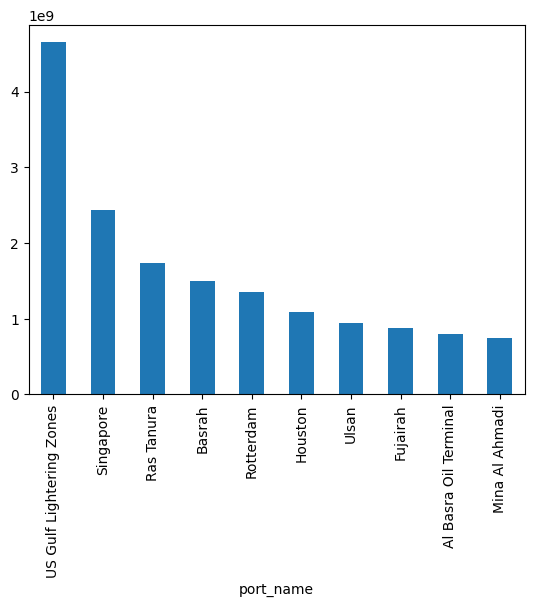

In [123]:
# very basic visualisation is built in to pandas:
sdf.set_index('port_name')['dwt'].plot.bar()

In [176]:
df['average_dwt'].describe([.9,.95,.975,.99]).round(0)

count    792126.0
mean      55570.0
std       56927.0
min         236.0
50%       37830.0
90%      114724.0
95%      177940.0
97.5%    207872.0
99%      302650.0
max      403880.0
Name: average_dwt, dtype: float64

<AxesSubplot: title={'center': 'Average DWT'}, ylabel='Frequency'>

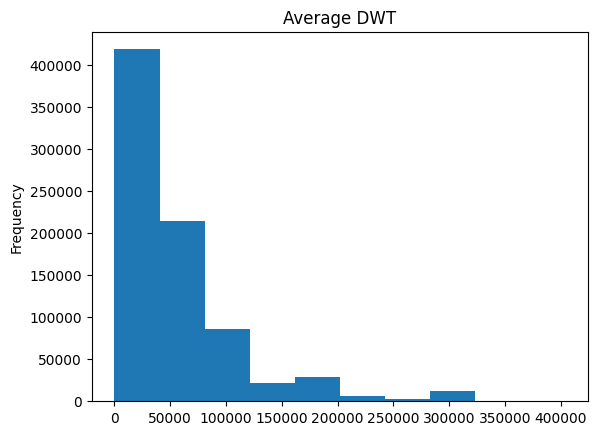

In [190]:
df['average_dwt'].plot.hist(by=None, bins=10, title = 'Average DWT')

In [58]:
df['month'] = pd.to_datetime(df['period_ending']).dt.month

In [63]:
df['region_corridor'].value_counts()

Asia               39334
Europe             23003
South America      11368
Middle East         9970
North America       9873
Africa              7665
Oceania             4954
Central America     3410
Caribbean           1860
Name: region_corridor, dtype: int64

### Plotly Express
- Make better looking plots with more flexibility in plotly

In [91]:
import plotly.express as px

d = df.copy()
d = d[['region_corridor','month','dwt']] # pick out 3 columns
# sum dwt of ship exits by month by corridor
d = d.groupby(['region_corridor', 'month'])['modified_dwt'].sum().reset_index() 

fig = px.line(d, # pass the dataframe to plotly express
              x="month", # define x 
              y="dwt", # define y
              color="region_corridor", # define variable to color lines by 
              line_shape="spline", # fit a spline between points
              title = 'Total Dead Weight Tonnage by Shipping Region Corridor',
              labels = {'month':'Month',
                        'dwt':'Dead Weight Tonnage (dwt)',
                        'region_corridor':'Region Corridor'},
              height = 750
             )


fig.show()

In [124]:
d = df.copy() # copy the dataset
d = d[d.port_name == 'Hong Kong'] # look only at ships entering Hong Kong port
d['Ship Description'] = d['ship_type']+' - '+d['ship_size'] # make a new composite column 
d = d.groupby(['month','Ship Description'])['modified_dwt'].sum().reset_index() # groupby new column

d = d.sort_values(by = 'Ship Description')

fig = px.bar(d, # pass the dataframe to plotly express
              x="month", # define x 
              y="modified_dwt", # define y
              color="Ship Description", # define variable to color lines by 
              title = 'Modified Dead Weight Tonnage by Ship Type Arriving to Hong Kong',
              labels = {'month':'Month',
                        'modified_dwt':'Dead Weight Tonnage (dwt)'},
              color_discrete_map = {
                 'BULKER - LARGE':'#0A2F51',
                 'BULKER - MEDIUM':'#137177',
                 'BULKER - SMALL':'#1D9A6C',
                 'CONTAINER - LARGE':'#98397E',
                 'CONTAINER - MEDIUM':'#C54F65',
                 'CONTAINER - SMALL':'#D67693',
                 'TANKER - LARGE':'#486E86',
                 'TANKER - MEDIUM':'#6E9ABC',
                 'TANKER - SMALL':'#97C4EF'
                 },
              height = 750
             )
fig.show()

In [ ]:
import plotly.express as px
import numpy as np
df = px.data.gapminder().query("year == 2007")
fig = px.treemap(df, path=[px.Constant('world'), 'continent', 'country'], values='pop',
                  color='lifeExp', hover_data=['iso_alpha'])
fig.show()